## Introduction

* **Natural Language Processing (NLP):** The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more

* **Sentiment Analysis:** It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.



### Sentiment analysis applications:

    Social media monitoring
    Brand monitoring
    Voice of customer (VoC)
    Customer service
    Market research




In [2]:
!pip install wordcloud 

     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00


In [95]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
# Importing the dataset
df = pd.read_csv('../data/raw data/twitt30k.csv')

In [65]:
df.head(20)

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0
5,Really upset http://myloc.me/5x1T,0
6,@lilyroseallen big pool or paddling pool?! mig...,1
7,@arianna_skye Hee! I did tweet... And you'...,1
8,is happy to have Tickets for the Concerts,1
9,"@mileycyrus http://twitpic.com/78urd - Miley, ...",1


In [66]:
df.shape

(30000, 2)

In [67]:
#positive sentiments =1
df[df["sentiment"]==1]

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
6,@lilyroseallen big pool or paddling pool?! mig...,1
...,...,...
29991,you go girl!!! write like your heart depends o...,1
29993,Sometimes I even fascinate myself... As I stum...,1
29994,On my way to jons,1
29998,@karmicunderpath ooooh now there's a nice thou...,1


In [68]:
#negative sentiments =0
df[df["sentiment"]==0]

,twitts,sentiment
4,"@kissthestars Pretty pretty pretty please, pak...",0
5,Really upset http://myloc.me/5x1T,0
10,must.go.to.bed.early!,0
12,uh oh.. the sound is messed up on cable,0
14,What? I'm not the best?,0
...,...,...
29989,I am sad I have to leave Randy Howard to go to...,0
29992,I'm recieving alot of shocking news one shot ....,0
29995,@Calumfan1 is it in any way related to photosh...,0
29996,@Swiz_NZ really? wow thats crap,0


In [69]:
df["sentiment"].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

## <a name="p3">Preprocess Text</a>
**Text Preprocessing** is traditionally an important step for **Natural Language Processing (NLP)** tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

**The Preprocessing steps taken are:**
1. **Lower Casing:** Each text is converted to lowercase.
2. **Replacing URLs:** Links starting with **"http" or "https" or "www"** are replaced by **"URL"**.
3. **Replacing Emojis:** Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. *(eg: ":)" to "EMOJIsmile")*
4. **Replacing Usernames:** Replace @Usernames with word **"USER"**. *(eg: "@Nilay" to "USER")*
5. **Removing Non-Alphabets:** Replacing characters except Digits and Alphabets with a space.
6. **Removing Consecutive letters:** 3 or more consecutive letters are replaced by 2 letters. *(eg: "Heyyyy" to "Heyy")*
7. **Removing Short Words:** Words with length less than 2 are removed.
8. **Removing Stopwords:** Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. *(eg: "the", "he", "have")*
9. **Lemmatizing:** Lemmatization is the process of converting a word to its base form. *(e.g: “Great” to “Good”)*

In [70]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile',
          ':-)': 'smile',
          ';d': 'wink', 
          ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

RegEx

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

RegEx Module
Python has a built-in package called re, which can be used to work with Regular Expressions

In [71]:
s1="See you ALL IN 2023."
re.findall("[a-z]",s1)

['e', 'e', 'y', 'o', 'u']

In [72]:
re.findall("[A-Z]",s1)

['S', 'A', 'L', 'L', 'I', 'N']

In [73]:
re.findall("[a-zA-Z]",s1)

['S', 'e', 'e', 'y', 'o', 'u', 'A', 'L', 'L', 'I', 'N']

In [74]:
re.findall("[0-9]",s1)

['2', '0', '2', '3']

In [75]:
re.findall("[^0-9]",s1)

['S',
 'e',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'A',
 'L',
 'L',
 ' ',
 'I',
 'N',
 ' ',
 '.']

In [76]:
re.sub("[0-9]","#",s1)

'See you ALL IN ####.'

In [77]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
!pip install contractions

In [79]:
txt="this is a demo text"
txt
for word in txt.split():
    if word in sw_nltk:
        print(word)

this
is
a


In [80]:
twitts_list=list(df["twitts"])
twitts_list[0:10]

['@robbiebronniman Sounds like a great night. ',
 'Damn the person who stolde my wallet !!!!!  May karma come back and bite you in the ass.... ',
 'Greetings from the piano bench  (photo) http://twitpic.com/6oe8i',
 '@drewryanscott i love it!! i love you!! haha forget a hug...you should give me a kiss...no lie!! please it would be awesome if you did ',
 '@kissthestars Pretty pretty pretty please, pakidownload ito then reupload someother site like mediafire. hindi mgwork ang MU skin. ',
 'Really upset  http://myloc.me/5x1T',
 "@lilyroseallen big pool or paddling pool?! might be able to manage a paddle pool in my surroundings but that's as luxury as it will get!! ",
 "@arianna_skye  Hee!   I did tweet...  And you're 10,001!!! LOL ",
 'is happy to have Tickets for the Concerts ',
 '@mileycyrus http://twitpic.com/78urd - Miley, u look soooo much better like this...  its soooo laid back!']

In [81]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    #patterns for 3 or more consecutive letters by 2 letter.
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, "", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if word not in sw_nltk:
                if len(word)>1:
                    # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')            
        processedText.append(tweetwords)
        
    return processedText

In [82]:
import time
t = time.time()
#df["twitts"] =df["twitts"].apply(preprocess)
processedtext = preprocess(twitts_list)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 1 seconds


In [83]:
df['twitts'].iloc[0:10]

0         @robbiebronniman Sounds like a great night. 
1    Damn the person who stolde my wallet !!!!!  Ma...
2    Greetings from the piano bench  (photo) http:/...
3    @drewryanscott i love it!! i love you!! haha f...
4    @kissthestars Pretty pretty pretty please, pak...
5                   Really upset  http://myloc.me/5x1T
6    @lilyroseallen big pool or paddling pool?! mig...
7    @arianna_skye  Hee!   I did tweet...  And you'...
8           is happy to have Tickets for the Concerts 
9    @mileycyrus http://twitpic.com/78urd - Miley, ...
Name: twitts, dtype: object

In [84]:
processedtext[0:10]

['USERsoundslikeagreatnight ',
 'damnthepersonwhostoldemywalletmaykarmacomebackandbiteyouintheass ',
 'greetingsfromthepianobenchphotoURL ',
 'USERiloveitiloveyouhahaforgetahugyoushouldgivemeakissnoliepleaseitwouldbeawesomeifyoudid ',
 'USERprettyprettyprettypleasepakidownloaditothenreuploadsomeothersitelikemediafirehindimgworkangmuskin ',
 'reallyupsetURL ',
 'USERbigpoolorpaddlingpoolmightbeabletomanageapaddlepoolinmysurroundingsbutthatsasluxuryasitwillget ',
 'USERheeididtweetandyoure1001lol ',
 'ishappytohaveticketsfortheconcerts ',
 'USERURLmileyulooksoomuchbetterlikethisitssoolaidback ']

In [85]:
df["processed_twitts"]=processedtext
df.head()

,twitts,sentiment,processed_twitts
0,@robbiebronniman Sounds like a great night.,1,USERsoundslikeagreatnight
1,Damn the person who stolde my wallet !!!!! Ma...,1,damnthepersonwhostoldemywalletmaykarmacomeback...
2,Greetings from the piano bench (photo) http:/...,1,greetingsfromthepianobenchphotoURL
3,@drewryanscott i love it!! i love you!! haha f...,1,USERiloveitiloveyouhahaforgetahugyoushouldgive...
4,"@kissthestars Pretty pretty pretty please, pak...",0,USERprettyprettyprettypleasepakidownloaditothe...


In [86]:
#Task - contractions removal, html tags removal

## <a name="p4">Analysing the data</a>
Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot **Word Clouds** for **Positive and Negative** tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

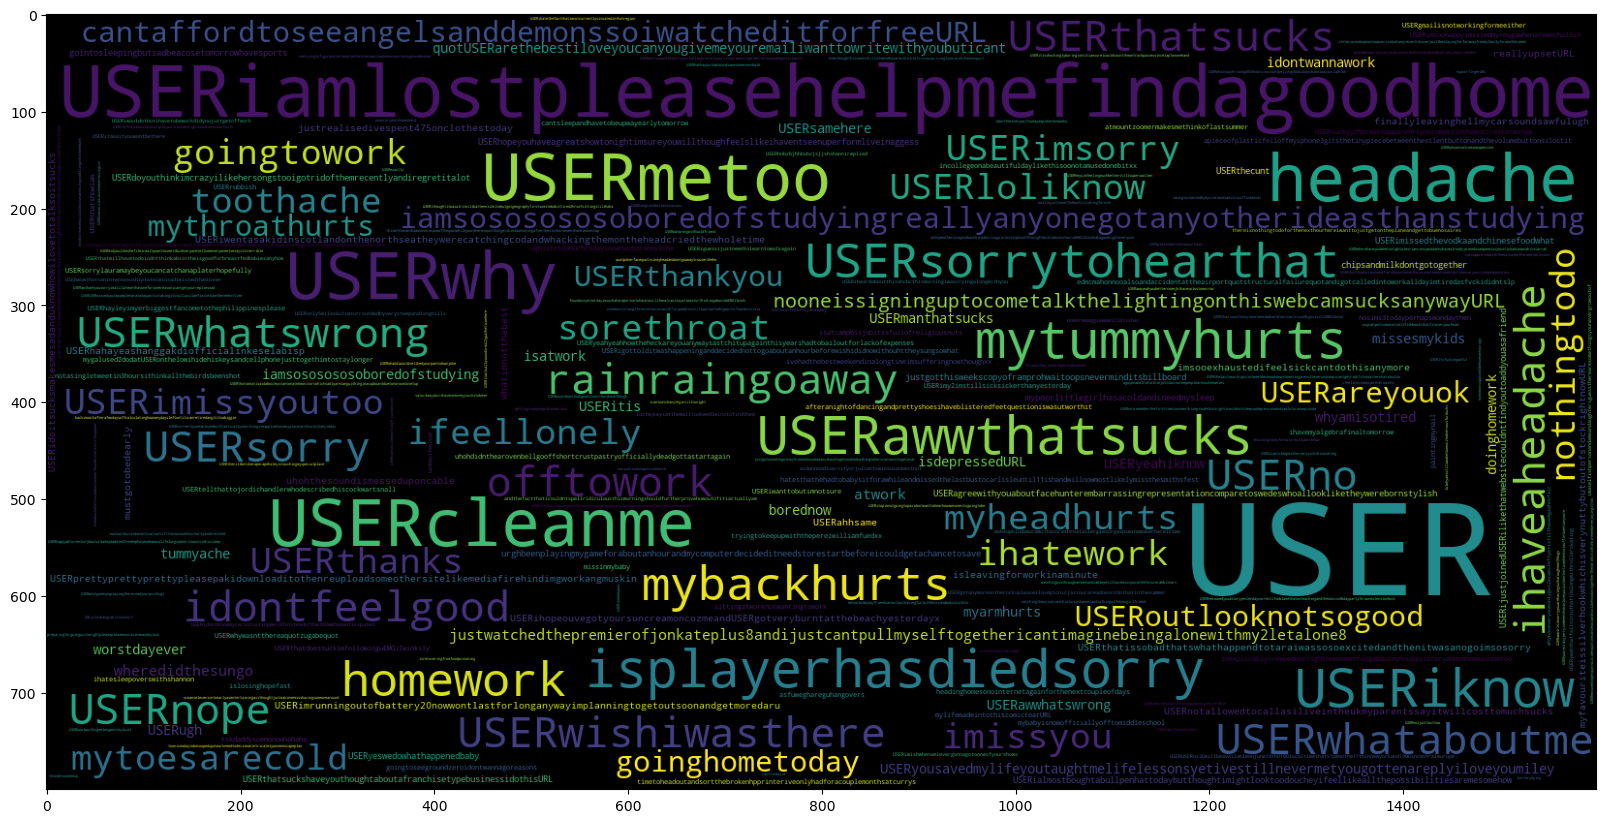

In [87]:
data_neg =df[df["sentiment"]==0]["processed_twitts"]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Word-Cloud for Positive tweets.

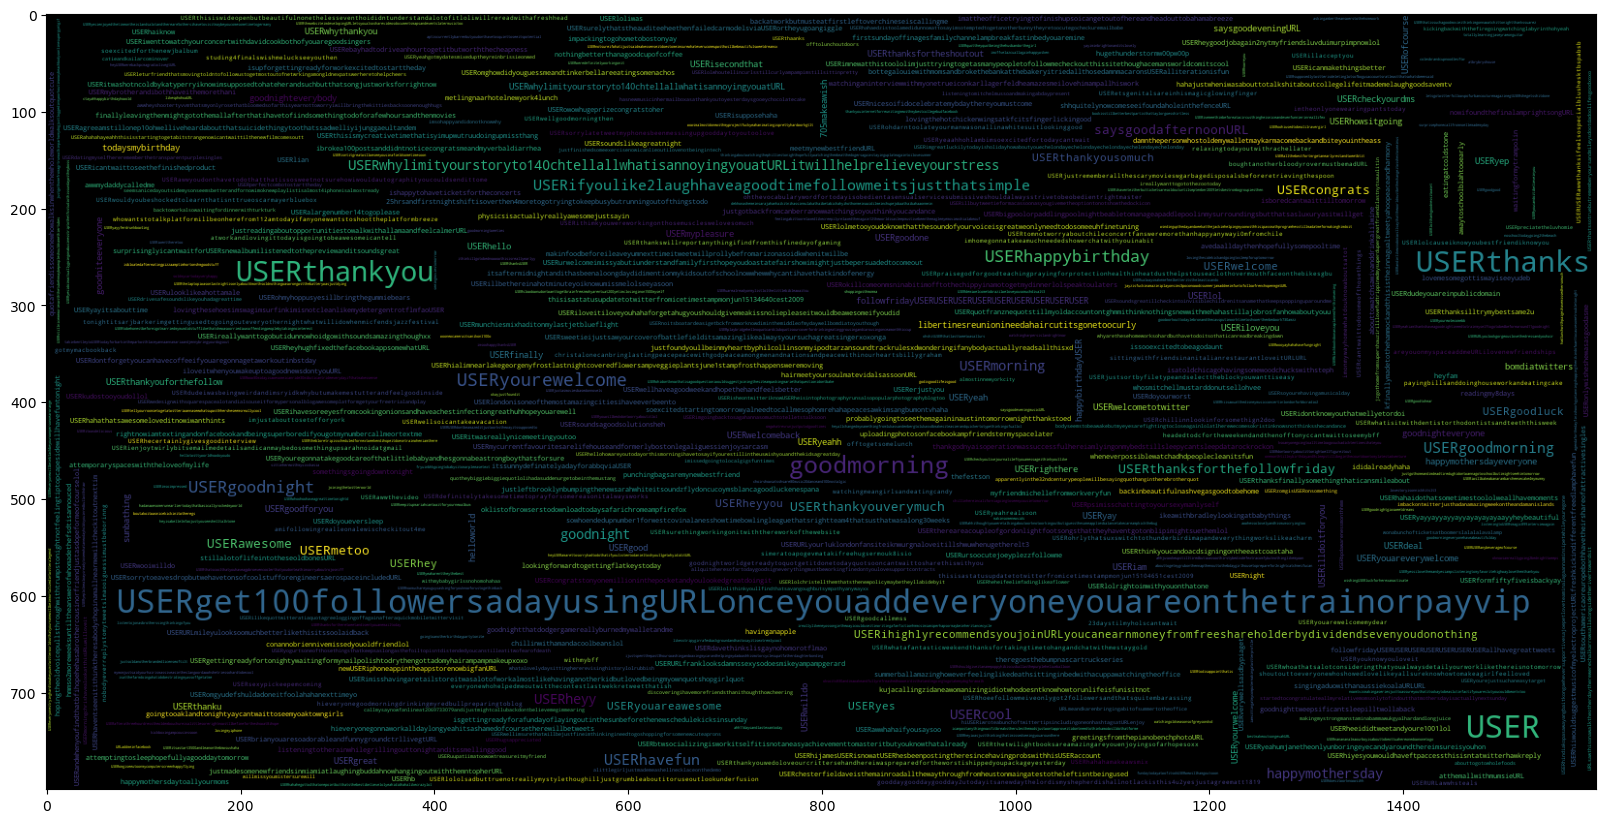

In [88]:
data_pos =df[df["sentiment"]==1]["processed_twitts"]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## <a name="p5">Splitting the Data</a>
The Preprocessed Data is divided into 2 sets of data: 
* **Training Data:** The dataset upon which the model would be trained on. Contains 95% data.
* **Test Data:** The dataset upon which the model would be tested against. Contains 5% data.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df["processed_twitts"],df["sentiment"], 
                                                    test_size = 0.20, random_state = 0)
print(f'Data Split done.')

Data Split done.


## <a name="p6">TF-IDF Vectoriser</a>
**TF-IDF indicates what the importance of the word is in order to understand the document or dataset.** Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

**TF-IDF Vectoriser** converts a collection of raw documents to a **matrix of TF-IDF features**. The **Vectoriser** is usually trained on only the **X_train** dataset. 

**ngram_range**  is the range of number of words in a sequence. *[e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]*

**max_features** specifies the number of features to consider. *[Ordered by feature frequency across the corpus]*.

In [90]:
#vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
#print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.


### <a name="p7">Tranforming the dataset</a>
Transforming the **X_train** and **X_test** dataset into matrix of **TF-IDF Features** by using the **TF-IDF Vectoriser**. This datasets will be used to train the model and test against it.

In [91]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [92]:
X_train.toarray()
#vectoriser.get_feature_names()
#len(vectoriser.get_feature_names())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
X_train.shape

(24000, 23656)

## <a name="p8">Creating and Evaluating Models</a>



In [94]:
def buil_model(models):
    trained_models=[]
    for model in models:
        model.fit(X_train,y_train)
        # Predict values for Test dataset
        y_pred = model.predict(X_test)

        # Print the evaluation metrics for the dataset.
        print(model, accuracy_score(y_test,y_pred))

        trained_models.append(model)
    return trained_models


In [96]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier()]

In [ ]:
trained_models=buil_model(models)

LogisticRegression() 0.49733333333333335
SVC() 0.49733333333333335
RandomForestClassifier() 0.49733333333333335


In [114]:
trained_models

[LogisticRegression(), SVC()]

## <a name="p9">Saving the Models</a>
We're using **PICKLE** to save **Vectoriser and BernoulliNB, Logistic Regression Model** for later use.

In [115]:
file = open('../models/vectoriser.pkl','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('../models/lr_model.pkl','wb')
pickle.dump(trained_models[0], file)
file.close()